

## Abstract

This report presents a comprehensive study on the selection of an optimal machine learning clustering algorithm for the ['Spotify unpopular songs'](https://www.kaggle.com/datasets/estienneggx/spotify-unpopular-songs) dataset. The goal is to develop a robust model that accurately cluster the 400s most unpopular songs in Spotify through 2022. The process begins with data preparation and processing, followed by feature engineering to extract meaningful attributes from the songs. Various machine learning models are then built and rigorously tested on these features. The performance of each model is evaluated using appropriate metrics. Finally, cross-validation techniques are employed to ensure the model’s generalizability and to determine the most effective clustering method. The findings of this report contribute to the ongoing efforts in the field of audio clustering, a field in which I, on a more personal note, am very interested.
The full code is available in my [github repository](https://github.com/esolanoo/MNIST-Classification).

## Methodology

1. **Goal Setting**: Define the objective of your project. In this case, it is to cluster unpopular songs from the dataset.

2. **Data Preparation**: Load the dataset and split it into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

3. **Data Processing**: This step can help improve the performance of many machine learning algorithms.

4. **Feature Engineering**: In this step, new features are cast from the existing ones.

5. **Model Building**: Train different machine learning models on the processed data.

6. **Model Testing**: Evaluate the performance of each model on the testing set.

7. **Cross-Validation**: Perform k-fold cross-validation and other methods to assess how well your model generalizes to unseen data.

8. **Model Selection**: Based on the cross-validation results, select the model that performs the best on the validation sets.

9. **Final Evaluation**: Finally, evaluate the performance of your selected model on the testing set.

## Load the dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd 
from scipy.stats import shapiro
import seaborn as sea
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
import scikitplot as skplt
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [2]:
songs = pd.read_csv('archive/unpopular_songs.csv').drop(['track_id', 'track_name'], axis=1)
genres = pd.read_csv('archive/z_genre_of_artists.csv')
songs.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.955   0.281    0   -11.392     0       0.4660        0.0048   
2         0.753   0.355    8   -11.799     1       0.5140        0.5730   
3         0.650   0.331    3   -10.818     0       0.3830        0.8650   
4         0.690   0.360    4   -15.624     0       0.4550        0.7640   
5         0.849   0.275    6   -15.728     0       0.6940        0.4140   
6         0.846   0.269    9   -11.843     0       0.4600        0.7560   
7         0.725   0.235    6   -16.269     0       0.5070        0.7480   
8         0.724   0.315   10   -14.677     0       0.8610        0.4450   
9         0.699   0.209    6   -14.410     1       0.6200        0.3670   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0            0.0000    0.0926   0.9270  151.968       220549     False   
1            0.0595    0.1220   0.0934  127.991       149543      True   
2            0.0000    0.0735   0.6000   91.978       130019      True   
3            0.0000    0.1050   0.5810   99.513       116193      True   
4            0.0000    0.1810   0.1050   89.893       111827      True   
5            0.0000    0.0776   0.3760  102.053       128546      True   
6            0.0000    0.0914   0.3180   91.991       139527      True   
7            0.0000    0.1160   0.5490   96.462       138762      True   
8            0.0000    0.0863   0.5310   91.456       138456      True   
9            0.0000    0.0632   0.2980   89.102       262971      True   

   popularity track_artist  
0           8      El Javi  
1           0         Br80  
2           0   JpThaRuler  
3           0   JpThaRuler  
4           0   JpThaRuler  
5           0   JpThaRuler  
6           0   JpThaRuler  
7           0   JpThaRuler  
8           0   JpThaRuler  
9           0   JpThaRuler

In [3]:
songs.shape
# songs.df.drop_duplicates(inplace=True)
# songs.shape

(4073, 15)

In [4]:
print(genres.shape)
genres.head()

(701, 4)


Unnamed: 0 artist_name               artist_id               genre
0           0     El Javi  6qZksHG4gzbRx3FZplO4Ls                  []
1           1        Br80  3x0tOQYysaBspzDp0PGDoM                  []
2           2  JpThaRuler  1n5X8uMaNKFI4BAXFpD2AZ  ['westcoast flow']
3           3     Jimmy D  7g0eqYROzcQjp6Jflh7dPT                  []
4           4      Kafime  2PkEwFBI1VcQL5VYtFMd9h                  []

The *genres* dataset needs to be cleaned and processed before any analysis can be performed.

In [5]:
genres[genres['genre']=='[]'].count()

Unnamed: 0     519
artist_name    519
artist_id      519
genre          519
dtype: int64

In [6]:
genres['genre'].replace('[]', "['Unknown']", inplace=True)
genres['genre'] = genres['genre'].apply(lambda x: x[2:-2])
genres.head(10)

Unnamed: 0 artist_name               artist_id           genre
0           0     El Javi  6qZksHG4gzbRx3FZplO4Ls         Unknown
1           1        Br80  3x0tOQYysaBspzDp0PGDoM         Unknown
2           2  JpThaRuler  1n5X8uMaNKFI4BAXFpD2AZ  westcoast flow
3           3     Jimmy D  7g0eqYROzcQjp6Jflh7dPT         Unknown
4           4      Kafime  2PkEwFBI1VcQL5VYtFMd9h         Unknown
5           5      Yvng 7  2ZWVQzEjNfIydXDKtQalWN         Unknown
6           6    Talamaur  4KvSIbNlSsZ12tGXO6Jwo3         Unknown
7           7     Blockos  10epWCA0VX1WJKDffm8y7h         Unknown
8           8        AC3!  6J1pp5JZacuWUGJUcctSDr         Unknown
9           9      PROZVC  4pMTZqDH6vCRzSDy4dOvGR         Unknown

### Datasets merging

Both datasets can be merged on the name of the artists that performs the song. With a the 519 examples, as seen with `genres[genres['genre']=='[]'].count()`, of unknown genres, we can safely drop them by merging on using `how='inner'`in the `DataFrame.merge` method.




In [7]:
songs = songs.merge(genres[['artist_name', 'genre']], left_on='track_artist', right_on='artist_name', how='inner')
songs.drop('artist_name', axis=1, inplace=True)
songs.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.722   0.476    5    -8.203     1       0.0896        0.6700   
1         0.722   0.476    5    -8.203     1       0.0896        0.6700   
2         0.765   0.278    5    -7.383     1       0.0357        0.8100   
3         0.765   0.278    5    -7.383     1       0.0357        0.8100   
4         0.955   0.281    0   -11.392     0       0.4660        0.0048   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0            0.0000    0.0926   0.9270  151.968       220549     False   
1            0.0000    0.0926   0.9270  151.968       220549     False   
2            0.0000    0.0575   0.8090  129.915       221547     False   
3            0.0000    0.0575   0.8090  129.915       221547     False   
4            0.0595    0.1220   0.0934  127.991       149543      True   

   popularity track_artist    genre  
0           8      El Javi  Unknown  
1           8      El Javi  Unknown  
2           8      El Javi  Unknown  
3           8      El Javi  Unknown  
4           0         Br80  Unknown

In [8]:
songs.shape

(4115, 16)

In [9]:
songs['genre'].value_counts()

genre
Unknown                                                           2794
pianissimo                                                          60
go-go                                                               52
binaural                                                            50
white noise                                                         30
                                                                  ... 
dance pop', 'pop', 'post-teen pop', 'rap', 'urban contemporary       1
baltimore hip hop                                                    1
alabama rap                                                          1
edm                                                                  1
sad sierreno                                                         1
Name: count, Length: 163, dtype: int64

In [10]:
categorical_cols = ['key','mode', 'explicit', 'popularity', 'track_artist', 'genre']
time_col = 'duration_ms'
audio_cols = [col for col in songs.columns if col not in categorical_cols and col != time_col]

## Data Exploration


In [11]:
songs.describe().T

count           mean            std          min  \
danceability      4115.0       0.587557       0.190185      0.00000   
energy            4115.0       0.525274       0.250514      0.00002   
key               4115.0       5.062211       3.597928      0.00000   
loudness          4115.0     -11.160824       5.988285    -43.04600   
mode              4115.0       0.656379       0.474974      0.00000   
speechiness       4115.0       0.147481       0.171370      0.00000   
acousticness      4115.0       0.346733       0.341056      0.00000   
instrumentalness  4115.0       0.217595       0.360040      0.00000   
liveness          4115.0       0.189447       0.166394      0.01650   
valence           4115.0       0.462217       0.264940      0.00000   
tempo             4115.0     120.002653      31.138264      0.00000   
duration_ms       4115.0  223716.282382  262502.718733  17951.00000   
popularity        4115.0       1.253949       2.290286      0.00000   

                          25%            50%          75%          max  
danceability           0.4650       0.604000       0.7300        0.973  
energy                 0.3600       0.544000       0.7090        1.000  
key                    2.0000       5.000000       8.0000       11.000  
loudness             -13.5175      -9.693000      -7.0630        0.416  
mode                   0.0000       1.000000       1.0000        1.000  
speechiness            0.0390       0.061700       0.2170        0.962  
acousticness           0.0379       0.217000       0.6240        0.996  
instrumentalness       0.0000       0.000037       0.3520        1.000  
liveness               0.0978       0.122000       0.2200        0.990  
valence                0.2540       0.448000       0.6645        0.987  
tempo                 96.0010     119.982000     140.0570      215.983  
duration_ms       142568.0000  189728.000000  244950.0000  3408890.000  
popularity             0.0000       0.000000       1.0000        9.000

Some important insisght from the descriptive statistics can be drawn below.

1. Danceability: A low standard deviation might indicate a small range of variety of danceability levels among the songs.
1. Energy: A high mean in the ‘energy’ attribute might suggest that the songs in the dataset are generally fast and noisy. A high standard deviation might indicate that most songs have difgferent energy levels.
1. Loudness: If the maximum loudness is significantly higher than the 75th percentile, it could indicate that there are a few exceptionally loud songs in the dataset.
1. Speechiness: A low mean in speechiness might suggest that the songs contain very few spoken words. It may indicate that the songs are more instrumental.
1. Instrumentalness: If the 25th percentile of instrumentalness is close to 1, it suggests that at least 25% of the songs are purely instrumental.
1. Valence: A low mean valence might suggest that the songs in the dataset are generally more sad or angry.
1. Tempo: there should not be songs with 0 in tempo
1. Duration: A high standard deviation in duration might suggest a wide variety of song lengths in the dataset.

In [12]:
songs = songs[songs['tempo'] != 0]

## Data Visualization and Preprocessing

In [13]:
temp = audio_cols + [time_col]
fig = make_subplots(rows=1, cols=len(temp))

for i, col in enumerate(temp, start=1):
    fig.add_trace(go.Box(y=songs[col], notched=True, name=col), row=1, col=i)

fig.update_layout(title='Boxplots of Audio and Time Columns', showlegend=False)
fig.show()

In [14]:
fig = make_subplots(rows=len(temp)//2, cols=2, subplot_titles=temp)
fig.update_layout(autosize=False,
                  width=800,
                  height=800,)

for i, col in enumerate(temp):
    fig.add_trace(go.Histogram(x = songs[col]), row=i//2+1, col=i%2+1)

fig.update_layout(title='Histogram of Audio and Time Columns', showlegend=False)
fig.show()

The outliers are more apparent in the loudness, speechiness, instrumentalness, liveness, tempo, and duration_ms variables. Skewness is present in the same variables as well as the tempo variable.
Yeo-Johnson transformation can be applied to target those issues, and some of the other variable can benefit from it as well.
Accousticness and instrumentalness are removd from further modifications due to the lack of normality.

### Outliers

In [15]:
outliers = ['loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
yeo_johnson = [x for x in temp if x!='acousticness' and x!='instrumentalness']

In [16]:
from scipy.stats import zscore
songs = songs[(np.abs(zscore(songs[outliers])) < 3).all(axis=1)]

In [17]:
from scipy.stats import yeojohnson
for column in yeo_johnson:
  songs[column], _ = yeojohnson(songs[column])

In [18]:
fig = make_subplots(rows=1, cols=len(outliers), subplot_titles=outliers)

for i, col in enumerate(outliers, start=1):
    fig.add_trace(go.Box(y=songs[col], name=col, notched=True), row=1, col=i)

fig.update_layout(title='Boxplots of Audio and Time Columns after Outliers Removal and Yeo-Johnson', showlegend=False)
fig.show()

Although most of the outliers are removed, there are still some that are not. They can be further removed by using the Yeo-Johnson transformation, whic is applied to help the other variables achieve normality too.

In [19]:
fig = make_subplots(rows=len(yeo_johnson)//2, cols=2, subplot_titles=yeo_johnson)
fig.update_layout(autosize=False,
                  width=800,
                  height=800,)

for i, col in enumerate(yeo_johnson):
    fig.add_trace(go.Histogram(x = songs[col]), row=i//2+1, col=i%2+1)

fig.update_layout(title='Histograms of Audio and Time Columns after Outliers Removal and Yeo-Johnson', showlegend=False)
fig.show()

From visual inspection, assumtions can be made about the distribution of the variables, but a mathematical test can be applied to identify normally distributed variables to determine which columns are to be normalized and which are to be standardized.

In [20]:
normal = []
non_normal = []

for column in songs[temp].columns:
    stat, p = shapiro(songs[column])
    if p >= 0.05:
        normal.append(column)
    else:
        non_normal.append(column)

print(f'Normal columns: {normal}')
print(f'Non-normal columns: {non_normal}')

Normal columns: []
Non-normal columns: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


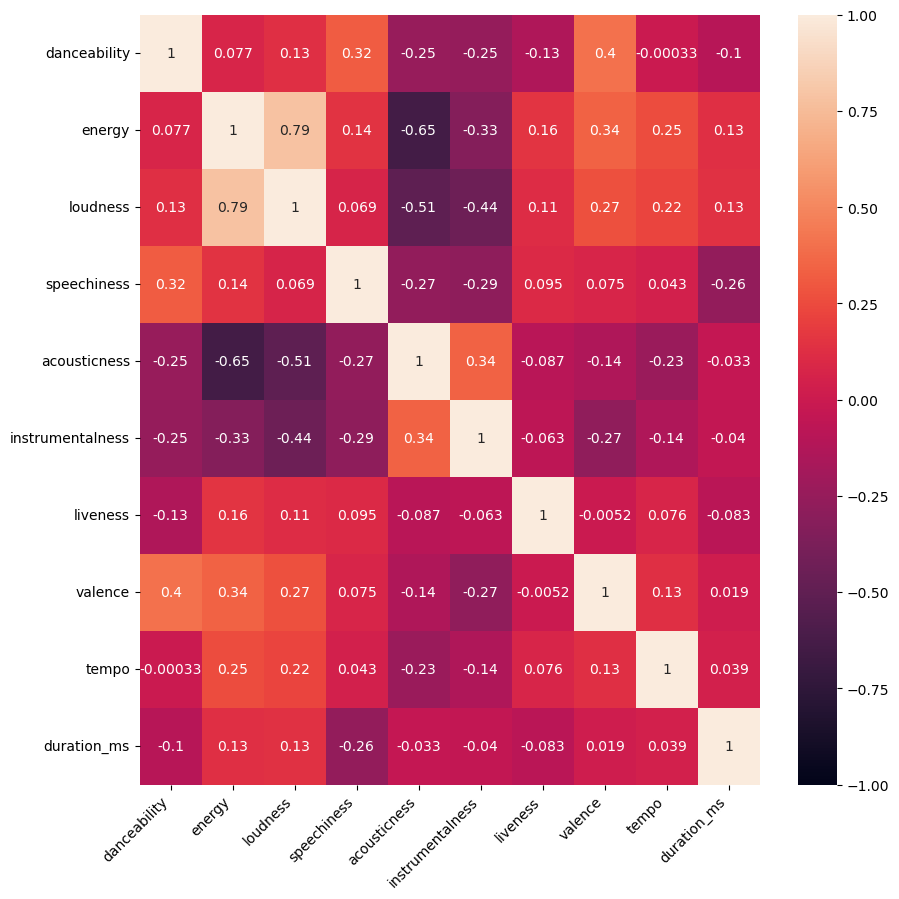

In [21]:
correlation = songs[temp].corr()
fig1 = plt.figure(figsize=(10,10))
ax = sea.heatmap(correlation, annot=True, vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
fig1.savefig('Correlation Heatmap.png', dpi=600, bbox_inches='tight')

## Data Transformation

In [22]:
ct = ColumnTransformer(
  transformers=[
      ('non_normal', MinMaxScaler(), non_normal),
      ('categorical', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_cols)
      ],
  remainder='passthrough', verbose_feature_names_out=False
)

songs = pd.DataFrame(ct.fit_transform(songs).toarray(), columns=ct.get_feature_names_out())
songs.sample(5)

danceability    energy  loudness  speechiness  acousticness  \
2846      0.612484  0.146294  0.224261     0.137431      0.589357   
1292      0.444279  0.454371  0.283362     0.028007      0.527108   
293       0.121921  0.111073  0.136468     0.140271      0.978916   
3620      0.676774  0.266606  0.229093     0.089810      0.318273   
2434      0.256004  0.345013  0.290543     0.040087      0.459839   

      instrumentalness  liveness   valence     tempo  duration_ms  ...  \
2846          0.945729  0.504342  0.246153  0.269949     0.484919  ...   
1292          0.141709  0.549775  0.221191  0.497723     0.664907  ...   
293           0.000006  0.702219  0.030994  0.058553     0.414736  ...   
3620          0.000662  0.596675  0.073272  0.516126     0.648410  ...   
2434          0.000000  0.463610  0.146834  0.646098     0.677753  ...   

      genre_tejano', 'tex-mex  genre_texas hardcore  genre_texas latin rap  \
2846                      0.0                   0.0                    0.0   
1292                      0.0                   0.0                    0.0   
293                       0.0                   0.0                    0.0   
3620                      0.0                   0.0                    0.0   
2434                      0.0                   0.0                    0.0   

      genre_tololoche  genre_trap queen  genre_turntablism', 'wonky  \
2846              0.0               0.0                         0.0   
1292              0.0               0.0                         0.0   
293               0.0               0.0                         0.0   
3620              0.0               0.0                         0.0   
2434              0.0               0.0                         0.0   

      genre_urban contemporary  genre_westcoast flow  genre_white noise  \
2846                       0.0                   0.0                0.0   
1292                       0.0                   0.0                0.0   
293                        0.0                   0.0                1.0   
3620                       0.0                   0.0                0.0   
2434                       0.0                   0.0                0.0   

      genre_workout product  
2846                    0.0  
1292                    0.0  
293                     0.0  
3620                    0.0  
2434                    0.0  

[5 rows x 795 columns]

In [23]:
pca = PCA(len(songs.columns))
pca.fit(songs)
songs_pca= pca.transform(songs)
#for i in range(len(songs.columns)):
#  print(f"PC {i+1}: {round(pca.explained_variance_ratio_[:i].sum()*100, 2)}%")

print(f"~80% of explained variance is accounted for the first 75 principal components")
print(f"PC[:75] = {pca.explained_variance_ratio_[:75].sum()*100}%")

~80% of explained variance is accounted for the first 75 principal components
PC[:75] = 80.10188231859617%


In [24]:
songs_pca = songs_pca[:, :75]
pd.DataFrame(songs_pca, columns = [f"PC_{i+1}" for i in range(75)]).sample(5)

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
3350  0.121153 -0.675513 -0.477204  0.808942 -0.167915 -0.430829  0.259861   
249   0.152515 -0.656088 -0.460566  0.685779 -0.330106  0.142880  0.076585   
3767  0.360567 -0.872773 -0.138835 -0.860792  0.125992 -0.240024 -0.322674   
2472  0.122796 -0.686549 -0.453624  0.786000 -0.135448 -0.404603  0.221240   
754  -1.178032  0.159429  0.439991  0.024745 -0.035380 -0.197782 -0.194252   

          PC_8      PC_9     PC_10  ...     PC_66     PC_67     PC_68  \
3350 -0.450643  0.460535 -0.240911  ... -0.079348 -0.078220  0.003685   
249  -0.379820 -0.799798 -0.379301  ...  0.064656  0.023265  0.003405   
3767  0.662836  0.093375 -0.195090  ...  0.032447  0.017384  0.011328   
2472 -0.431147  0.469673 -0.186889  ... -0.069387 -0.055507 -0.022770   
754  -0.138746 -0.071867  0.022284  ...  0.028166  0.006999  0.008300   

         PC_69     PC_70     PC_71     PC_72     PC_73     PC_74     PC_75  
3350 -0.002484 -0.008538 -0.035901 -0.017833 -0.001393  0.002499 -0.000269  
249  -0.077138 -0.118757 -0.295357 -0.083026  0.300932  0.003443 -0.253064  
3767  0.032791  0.007876  0.022943 -0.005728  0.005105 -0.016284 -0.011298  
2472  0.076171 -0.017206  0.001404 -0.038668  0.012975 -0.001501  0.004002  
754  -0.009432  0.011166 -0.009062  0.005137 -0.006470 -0.007221  0.001254  

[5 rows x 75 columns]

Therefore, the first 75 principal components are linearly related to the different features in the following table. Each coefficient represents the correlation between a particular pair of components and features.

In [25]:
components = pd.DataFrame(pca.components_[:75], columns=songs.columns, index=[f"PC_{i+1}" for i in range(75)])
components.sample(5)

danceability    energy  loudness  speechiness  acousticness  \
PC_71      0.019147  0.083199 -0.168641    -0.026065      0.009868   
PC_47     -0.002648  0.031314 -0.088322     0.010760      0.004126   
PC_19     -0.013179  0.027869  0.009899     0.027131     -0.010363   
PC_35     -0.087684 -0.068762 -0.025247     0.031779     -0.084897   
PC_37     -0.044759 -0.056577 -0.045085    -0.014336     -0.017504   

       instrumentalness  liveness   valence     tempo  duration_ms  ...  \
PC_71         -0.012917 -0.000749 -0.010599 -0.007626    -0.025144  ...   
PC_47          0.000585  0.006248  0.005074 -0.006256    -0.013539  ...   
PC_19          0.038600  0.032803  0.045992 -0.007611    -0.001282  ...   
PC_35         -0.046532 -0.038471  0.020704 -0.033915    -0.088770  ...   
PC_37         -0.012454  0.010117  0.017188  0.007015    -0.147837  ...   

       genre_tejano', 'tex-mex  genre_texas hardcore  genre_texas latin rap  \
PC_71                 0.001950              0.003318               0.003774   
PC_47                -0.000382              0.003997              -0.000241   
PC_19                -0.000493              0.003678              -0.000911   
PC_35                -0.000310             -0.004863              -0.000796   
PC_37                -0.000529             -0.001417              -0.002705   

       genre_tololoche  genre_trap queen  genre_turntablism', 'wonky  \
PC_71         0.000872         -0.000280                   -0.009559   
PC_47        -0.000527         -0.002911                    0.001671   
PC_19         0.000458          0.000228                   -0.001304   
PC_35        -0.001686         -0.002883                   -0.003846   
PC_37        -0.001103         -0.003962                   -0.020098   

       genre_urban contemporary  genre_westcoast flow  genre_white noise  \
PC_71                 -0.003367              0.012784           0.017083   
PC_47                 -0.000014              0.016160           0.000011   
PC_19                  0.000099             -0.003236          -0.003519   
PC_35                  0.002194             -0.011871          -0.001513   
PC_37                 -0.001396              0.001820           0.001181   

       genre_workout product  
PC_71               0.000977  
PC_47               0.010025  
PC_19              -0.010127  
PC_35              -0.158473  
PC_37               0.648199  

[5 rows x 795 columns]

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\2640235069.py:13: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword



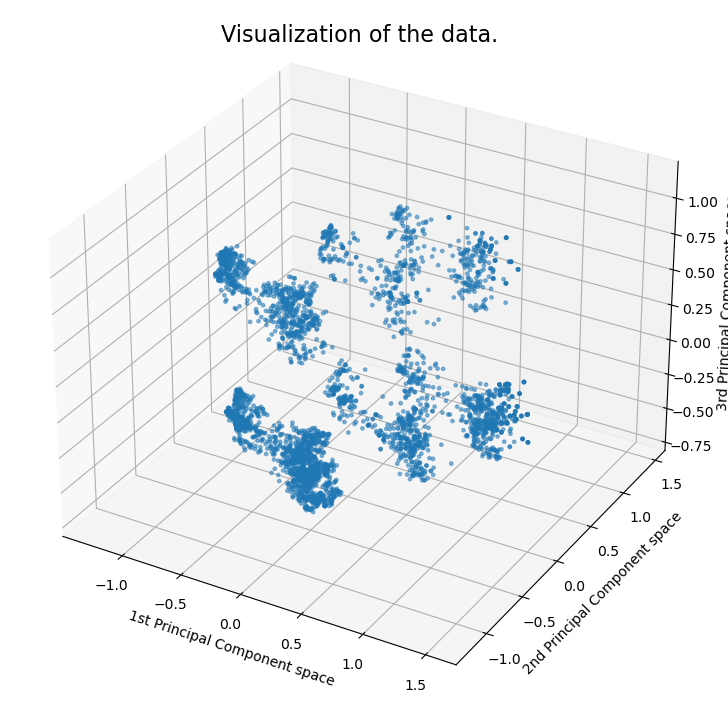

In [26]:
fig = plt.figure(constrained_layout=True, figsize=(7,7))
ax3d = Axes3D(fig,  auto_add_to_figure=False)
fig.add_axes(ax3d)

ax3d.scatter(songs_pca[:,0], songs_pca[:,1], songs_pca[:,2], s=6, alpha=0.5)

ax3d.set_xlabel("1st Principal Component space")
ax3d.set_ylabel("2nd Principal Component space")
ax3d.set_zlabel("3rd Principal Component space")

fig.suptitle("Visualization of the data.", size=16)

fig.savefig('Scatter3D.png', dpi=300)


## Clustering

### K-Means

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

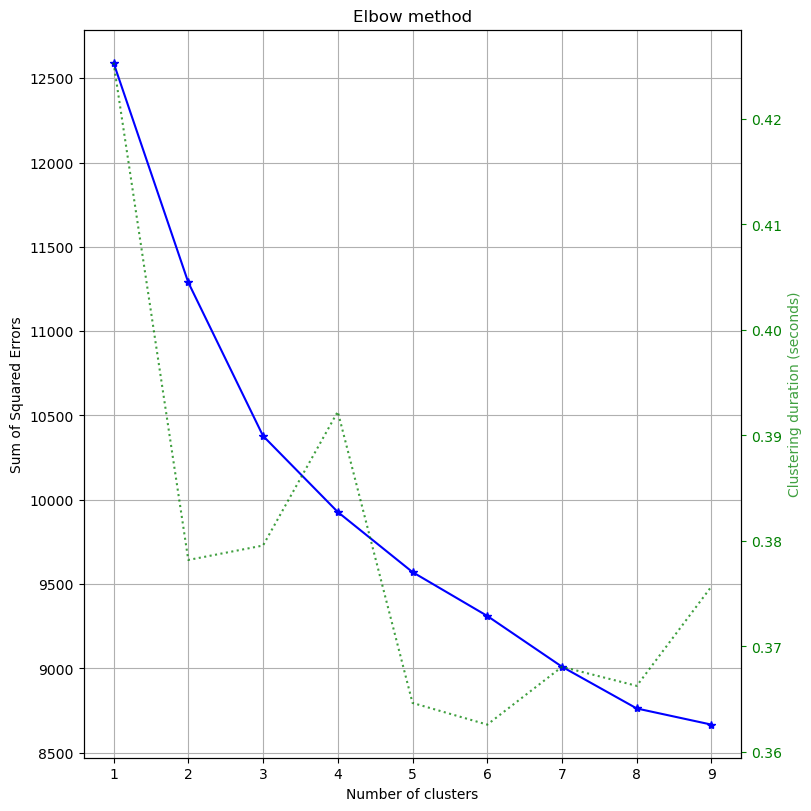

In [27]:
kmeans = KMeans()
fig= plt.figure(constrained_layout=True, figsize=(8,8))
ax = fig.add_subplot()
skplt.cluster.plot_elbow_curve(kmeans, X=songs_pca, cluster_ranges = range(1, 10),
                                title = 'Elbow method', show_cluster_time = True, ax=ax)
fig.savefig('Elbow.png', dpi=600, bbox_inches='tight')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1708659529.py:26: UserWarning:

The figure layout has changed to tight

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1708659529.py:28: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so canno

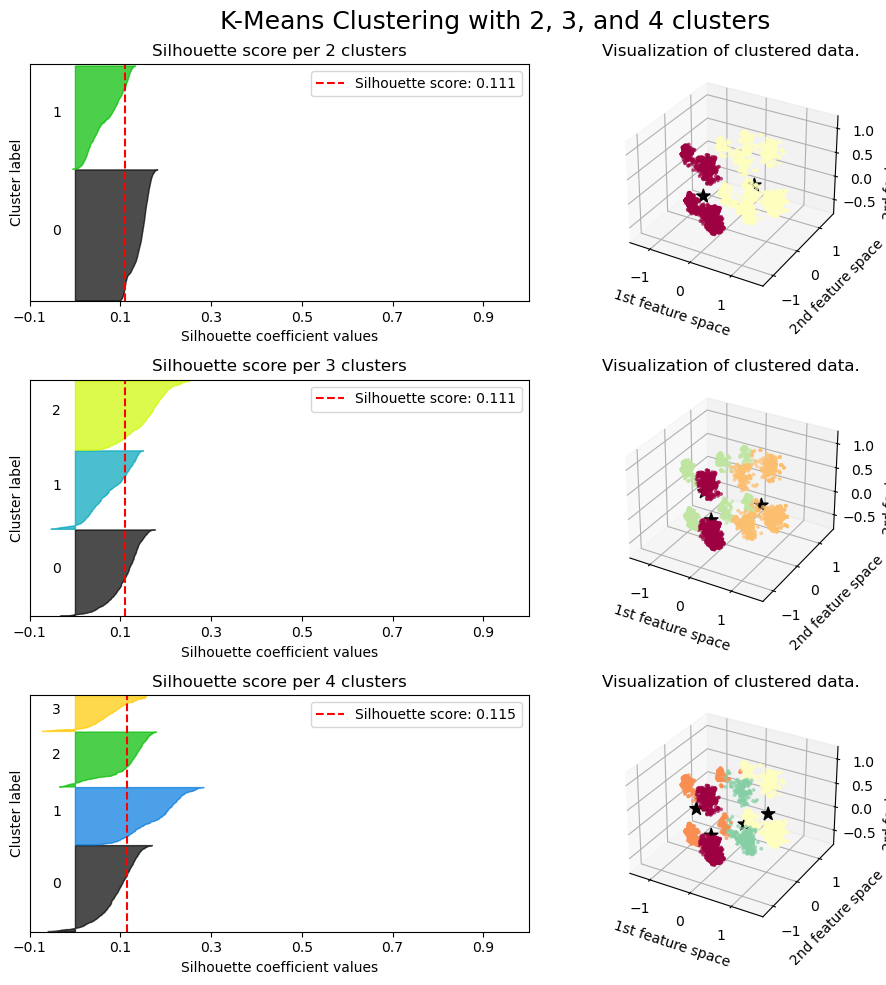

In [28]:
import matplotlib.gridspec as gridspec
clusters = [2, 3, 4]

fig = plt.figure(constrained_layout=True, figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=len(clusters), figure=fig)
axs2d = [fig.add_subplot(spec[i, 0]) for i in range(len(clusters))]
axs3d = [fig.add_subplot(spec[i, 1], projection='3d') for i in range(len(clusters))]

for i in range(len(clusters)):
  kmeans = KMeans(n_clusters=clusters[i])
  kmeans.fit(songs_pca)
  pred = kmeans.predict(songs_pca)
  skplt.metrics.plot_silhouette(songs_pca, kmeans.labels_, ax=axs2d[i],
                              title=f"Silhouette score per {clusters[i]} clusters")
  colors = plt.cm.Spectral(pred.astype(float)/clusters[i])
  axs3d[i].scatter(songs_pca[:, 0], songs_pca[:, 1], songs_pca[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
  centers = kmeans.cluster_centers_
  axs3d[i].scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', s=100, color='k', alpha=1)

  axs3d[i].set_title(f"Visualization of clustered data.")
  axs3d[i].set_xlabel("1st feature space")
  axs3d[i].set_ylabel("2nd feature space")
  axs3d[i].set_zlabel("3rd feature space")

fig.suptitle("K-Means Clustering with 2, 3, and 4 clusters", size=18)
fig.tight_layout()
fig.savefig('KMeans.png', dpi=600, bbox_inches='tight')
fig.show()

## Hierarchical Clustering

### Agglomerative Clustering

- Single Linkage: In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
- Ward Linkage: In ward linkage hierarchical clustering, the distance between two clusters is defined as the sum of the squared distances between all of the points in each cluster.
- Complete Linkage: In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.
- Average Linkage: In average linkage hierarchical clustering, the distance between two clusters is defined as the average of the distances between all of the points in each cluster.

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1065946902.py:16: UserWarning:

The figure layout has changed to tight

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1065946902.py:18: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



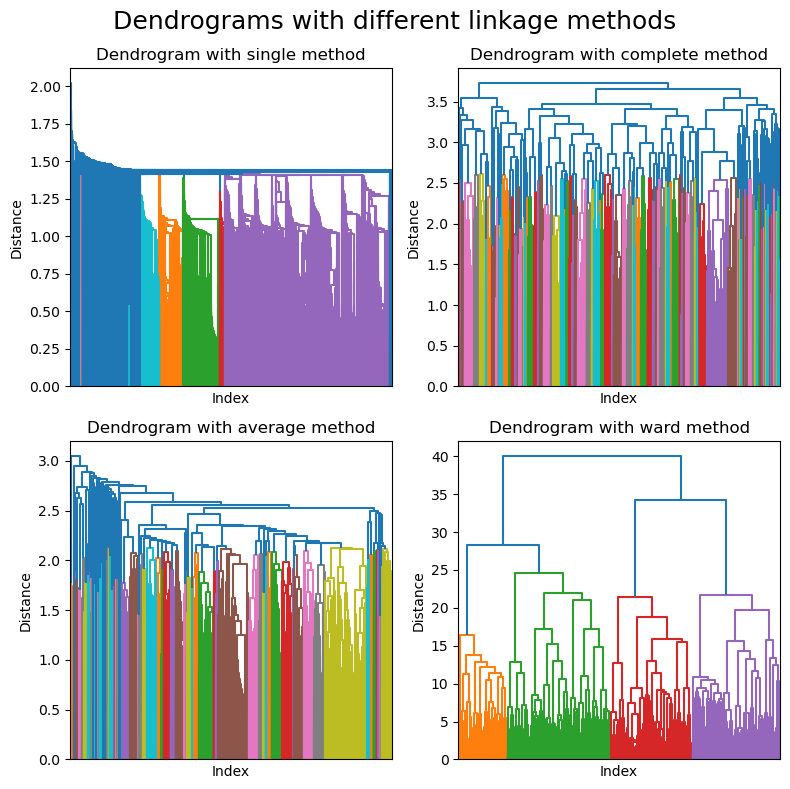

In [29]:
methods = ['single', 'complete', 'average', 'ward']

fig = plt.figure(constrained_layout=True, figsize=(8,8))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
axs = [fig.add_subplot(spec[i//2, i%2]) for i in range(len(methods))]

for i in range(len(methods)):
  linkage_data = linkage(songs_pca, method = methods[i])
  dendrogram(linkage_data, ax=axs[i])
  axs[i].set_title(f"Dendrogram with {methods[i]} method")
  axs[i].set_xlabel("Index")
  axs[i].set_ylabel("Distance")
  axs[i].xaxis.set_tick_params(labelbottom=False)

fig.suptitle("Dendrograms with different linkage methods", size=18)
fig.tight_layout()
fig.savefig('Dendrogram.png', dpi=600, bbox_inches='tight')
fig.show()

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1488009766.py:19: UserWarning:

The figure layout has changed to tight

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1488009766.py:21: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



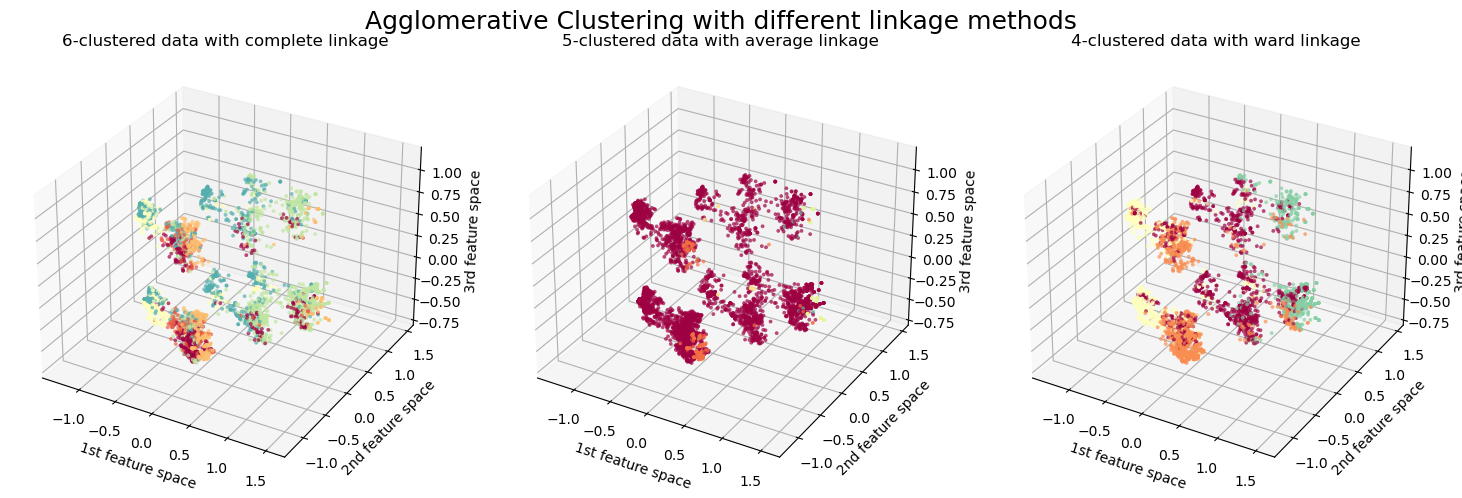

In [30]:
methods = ['complete', 'average', 'ward']
methods_clusters = [6, 5, 4]

fig = plt.figure(constrained_layout=True, figsize=(15,5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
axs = [fig.add_subplot(spec[i], projection='3d') for i in range(len(methods))]

for i in range(len(methods)):
  model = AgglomerativeClustering(n_clusters=methods_clusters[i], linkage=methods[i])
  pred = model.fit_predict(songs_pca)
  colors = plt.cm.Spectral(pred.astype(float)/methods_clusters[i])
  axs[i].scatter(songs_pca[:, 0], songs_pca[:, 1], songs_pca[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
  axs[i].set_title(f"{methods_clusters[i]}-clustered data with {methods[i]} linkage")
  axs[i].set_xlabel("1st feature space")
  axs[i].set_ylabel("2nd feature space")
  axs[i].set_zlabel("3rd feature space")

fig.suptitle("Agglomerative Clustering with different linkage methods", size=18)
fig.tight_layout()
fig.savefig('Agglomerative.png', dpi=600, bbox_inches='tight')
fig.show()

## DBSCAN

It is a density based clustering algorithm that is used for unsupervised learning problems.

In a bid to eliminate the problems of K-Means Clustering with nested data and high-dimensional data, DBSCAN Clustering eliminates it! It's has 2 important hyperparameters:

Hyperparameters :
- minPts : It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
- Epsilon : It is the radius of the area of a center point.

In [31]:

from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.01, 1.2, 0.05)
min_samples = np.arange(3, 10, 1)

params = list(product(eps_values, min_samples))

clusters, sil = [], []
for p in params:
    model = DBSCAN(eps=p[0], min_samples=p[1]).fit(songs_pca)
    clusters.append(len(np.unique(model.labels_)))
    sil.append(silhouette_score(songs_pca, model.labels_))
aux = pd.DataFrame.from_records(params, columns=['eps', 'min_samples'])
aux['silhouette'] = sil

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1217024211.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



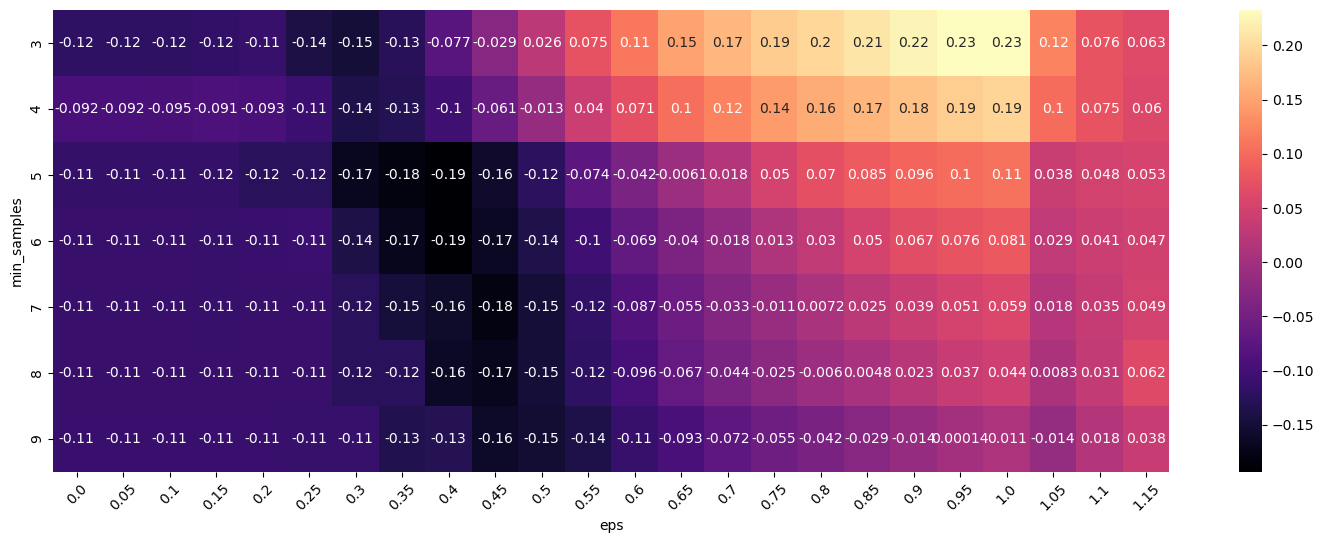

In [32]:
fig, ax = plt.subplots(figsize=(18,6))
pvt = pd.pivot_table(aux, values='silhouette', index='min_samples', columns='eps')
sea.heatmap(pvt, annot=True, annot_kws={"size": 10}, cmap="magma", ax=ax)
ax.set_xticklabels([round(x-0.01, 3) for x in eps_values], rotation=45)
fig.savefig('DBSCAN Heatmap.png', dpi=600, bbox_inches='tight')
fig.show()

In [33]:
dbscan_model= DBSCAN(eps=1, min_samples=5).fit(songs_pca)
songs_dbscan = pd.DataFrame(songs_pca).copy()
songs_dbscan.loc[:, 'cluster'] = dbscan_model.labels_
clusters = len(songs_dbscan['cluster'].unique().tolist())
clusters-1

155

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\1511720836.py:12: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



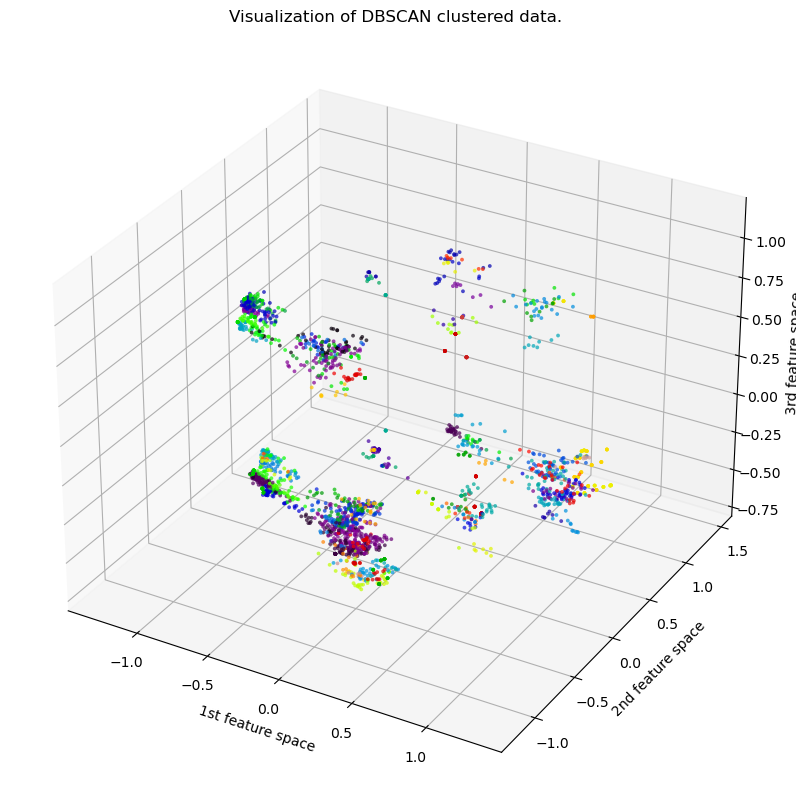

In [34]:
fig = plt.figure(constrained_layout=True, figsize=(8,8))
axs = fig.add_subplot(projection='3d')

temp = songs_dbscan[songs_dbscan.cluster != -1]
colors = plt.cm.nipy_spectral(temp.cluster.astype(float)/clusters)
axs.scatter(temp.iloc[:, 0], temp.iloc[:, 1], temp.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
axs.set_title("Visualization of DBSCAN clustered data.")
axs.set_xlabel("1st feature space")
axs.set_ylabel("2nd feature space")
axs.set_zlabel("3rd feature space")
fig.savefig('DBSCAN.png', dpi=600, bbox_inches='tight')
fig.show()

## Gaussian Mixture Model

It assumes that the data is generated from a mixture of several Gaussian distributions.

GMMs are versatile because they can identify complex patterns in data by modeling clusters with different variances and shapes. They provide probabilities for cluster assignments rather than definitive labels, allowing for soft clustering where data points can belong to multiple clusters with varying degrees of membership.

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_31628\2120799864.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



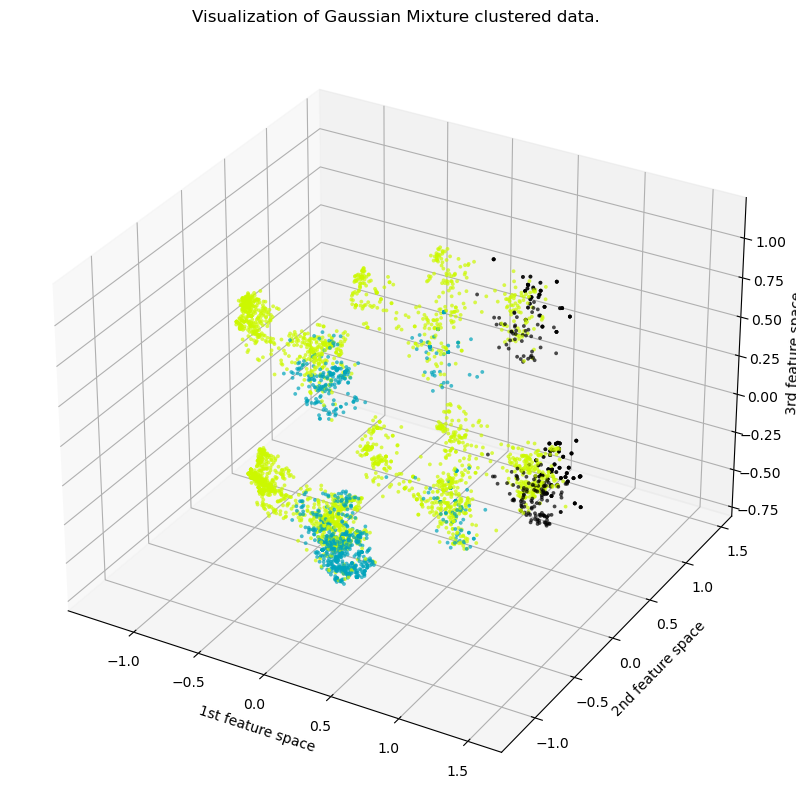

In [35]:

songs_gmm = pd.DataFrame(songs_pca).copy()
songs_gmm['cluster'] = GaussianMixture(n_components=3).fit_predict(songs_pca)
    # Same number of compponents as number of clusters per Elbow method

fig = plt.figure(constrained_layout=True, figsize=(8,8))
axs = fig.add_subplot(projection='3d')
colors = plt.cm.nipy_spectral(songs_gmm.cluster.astype(float)/3)
axs.scatter(songs_gmm.iloc[:, 0], songs_gmm.iloc[:, 1], songs_gmm.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors)
axs.set_title("Visualization of Gaussian Mixture clustered data.")
axs.set_xlabel("1st feature space")
axs.set_ylabel("2nd feature space")
axs.set_zlabel("3rd feature space")
fig.savefig('Gaussian.png', dpi=600, bbox_inches='tight')
fig.show()

In [36]:

test_predictions = GaussianMixture.predict(test_data)



NameError: name 'test_data' is not defined

## Metrics

In [ ]:

temps = [KMeans(n_clusters=4), AgglomerativeClustering(n_clusters=4, linkage='ward'), 
          DBSCAN(eps=1, min_samples=3), GaussianMixture(n_components=4)]

model_names = ['KMeans', 'Agglomerative', 'DBSCAN', 'Gaussian Mixture']

# model_names = ['KMeans', 'DBSCAN', 'Gaussian Mixture']


models = dict([(model_name, model) for model_name, model in zip(model_names, temps)])

### Silhouette Score

This metric measures how well each data point fits into its assigned cluster and ranges from -1 to 1. A high silhouette coefficient indicates that the data points are well-clustered, while a low coefficient indicates that the data points may be assigned to the wrong cluster.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_14416\2250743506.py:12: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



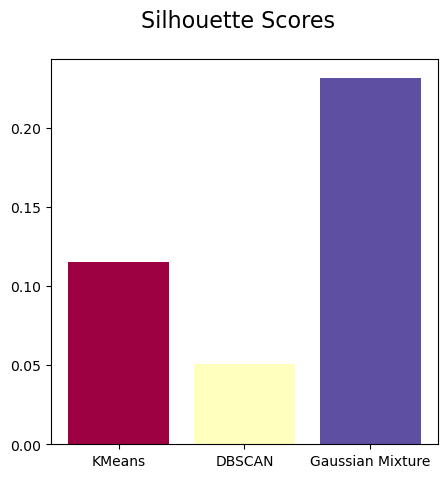

In [ ]:
scores = pd.DataFrame()
aux = []
for model in model_names:
    preds = models[model].fit_predict(songs_pca)
    aux.append(silhouette_score(songs_pca, preds))
scores['silhouette_score'] = aux   
fig, ax = plt.subplots(figsize=(5,5))
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(scores))]
ax.bar(model_names, aux, color=colors)
fig.suptitle("Silhouette Scores", size=16)
fig.savefig('Silhouette Scores.png', dpi=600, bbox_inches='tight')
fig.show()

### Davies-Bouldin Index

It is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. Lower the DB index value, better is the clustering.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_14416\1818277009.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



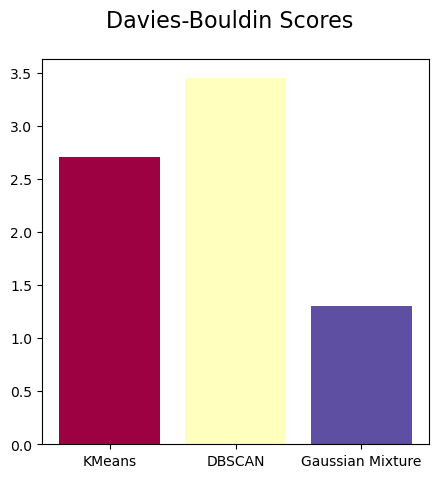

In [ ]:
from sklearn.metrics import davies_bouldin_score
aux = []
for model in model_names:
    preds = models[model].fit_predict(songs_pca)
    aux.append(davies_bouldin_score(songs_pca, preds))

scores['Davies-Bouldin'] = aux
fig, ax = plt.subplots(figsize=(5,5))
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(scores))]
ax.bar(model_names, aux, color=colors)
fig.suptitle("Davies-Bouldin Scores", size=16)
fig.savefig('Davies-Bouldin Scores.png', dpi=600, bbox_inches='tight')
fig.show()

### Calinski-Harabasz Index

This metric measures the ratio of the between-cluster variance to the within-cluster variance. A high Calinski-Harabasz index indicates that the clusters are well-separated and distinct

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_14416\510139909.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



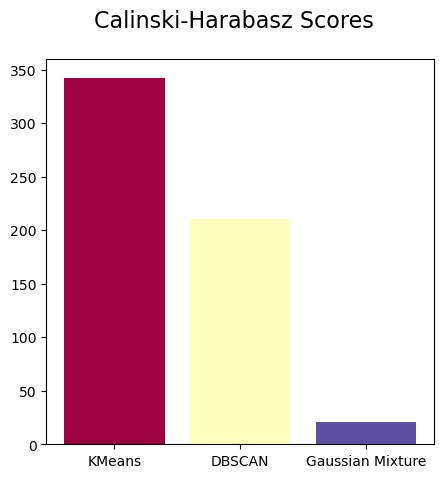

In [ ]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture

aux = []
for model in model_names:
    preds = models[model].fit_predict(songs_pca)
    aux.append(calinski_harabasz_score(songs_pca, preds))

scores['Calinski_harabasz'] = aux
fig, ax = plt.subplots(figsize=(5,5))
colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(scores))]
ax.bar(model_names, aux, color=colors)
fig.suptitle("Calinski-Harabasz Scores", size=16)
fig.savefig('Calinski-Harabasz Scores.png', dpi=600, bbox_inches='tight')
fig.show()

In [ ]:
scores.index = model_names

In [ ]:
scores = (scores - scores.min())/(scores.max() - scores.min())
scores['Davies-Bouldin'] = 1-scores['Davies-Bouldin']

In [ ]:
scores.T.sum()

KMeans              1.705344
DBSCAN              0.590252
Gaussian Mixture    2.000000
dtype: float64

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_14416\585829105.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



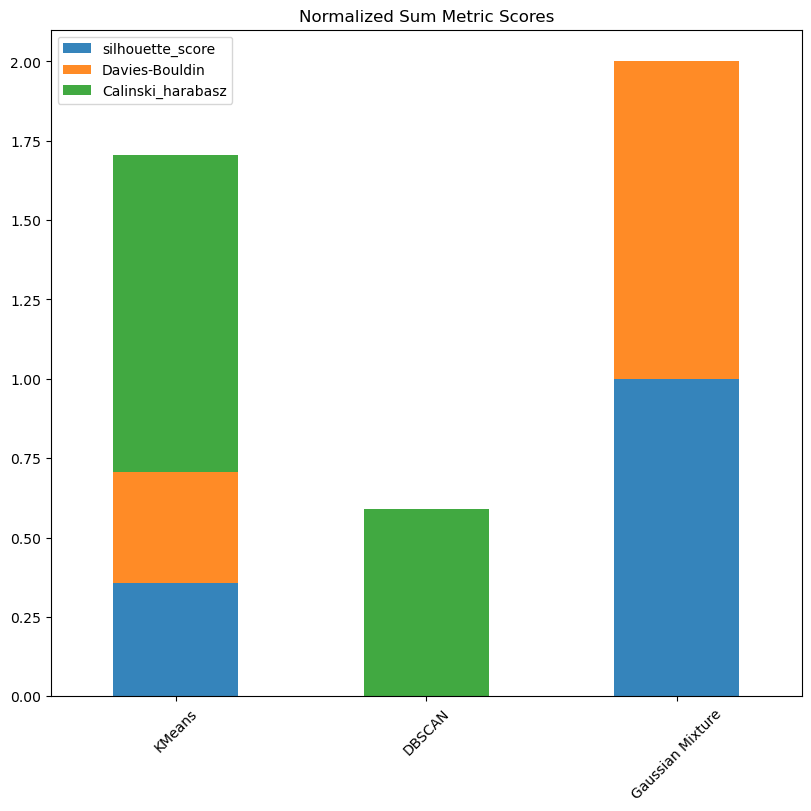

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(8,8))
ax = fig.subplots()
scores.plot.bar(rot=45, alpha=0.9, stacked=True, ax=ax)
ax.set_title("Normalized Sum Metric Scores")
fig.show()
fig.savefig('Metric scores.png', bbox_inches='tight', dpi=600)

## Conclussions

In [ ]:
list(components.mean().index).index('danceability')

0

C:\Users\HI.WELCOME TO NET\AppData\Local\Temp\ipykernel_14416\2350666348.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



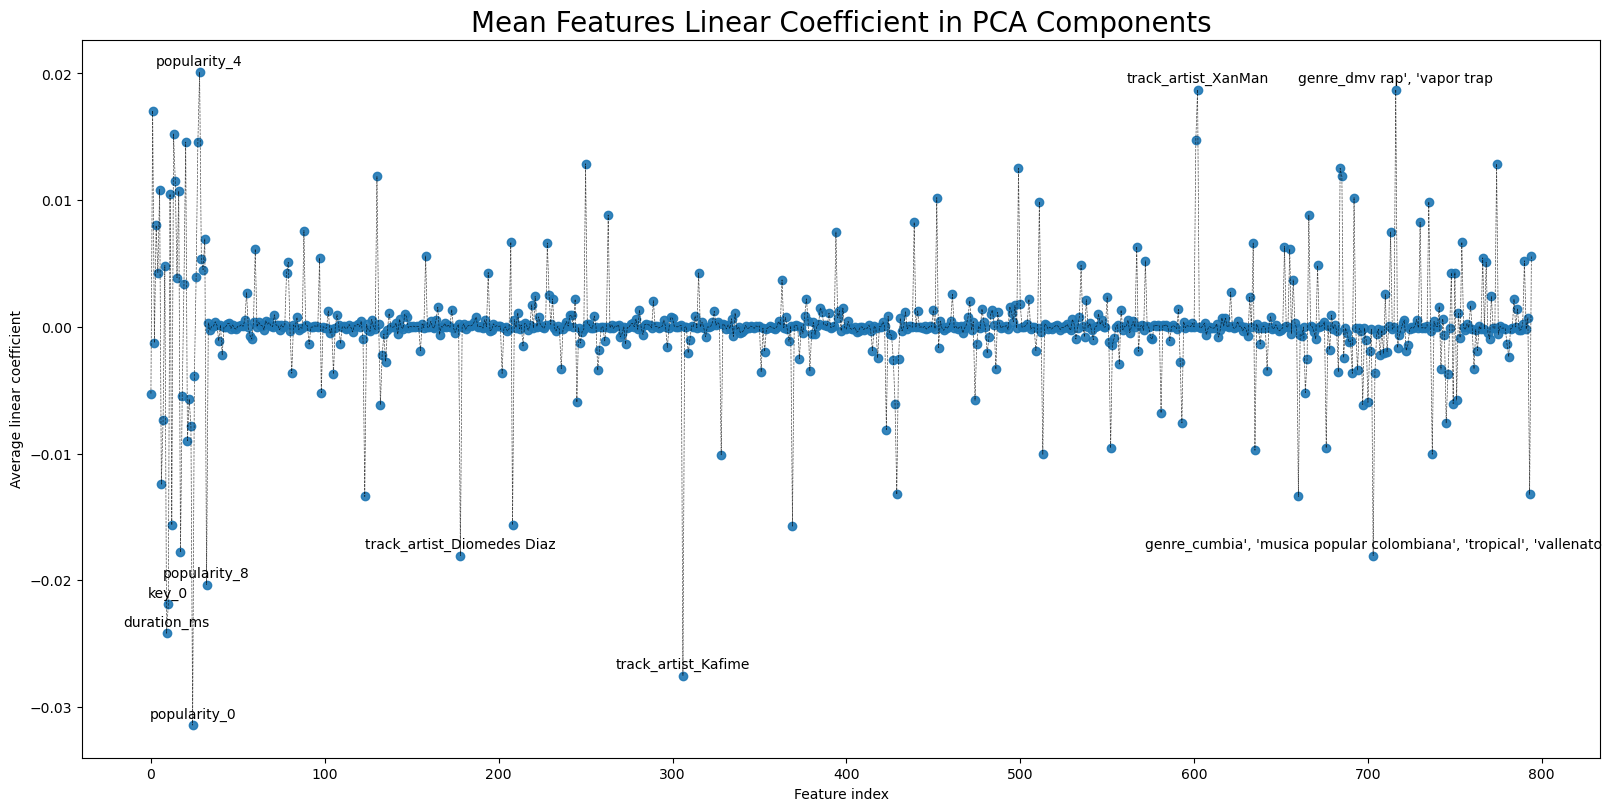

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(16,8))
ax = fig.add_subplot()
plt.scatter(range(len(components.mean())), components.mean(), label='Values', axes=ax, alpha=.9)
plt.plot(range(len(components.mean())), components.mean(), linestyle='--', color='k', 
         alpha=0.7, axes=ax, linewidth=.5)

top10 = components.mean().abs().nlargest(10)
for top in top10.index:
    plt.annotate(str(top), (list(components.mean().index).index(top), components.mean()[top]), 
                 textcoords='offset points', xytext=(0,5), ha='center')
    

ax.set_title("Mean Features Linear Coefficient in PCA Components", size=20)
ax.set_ylabel('Average linear coefficient')
ax.set_xlabel('Feature index')
fig.savefig('Components Coefficients.png', bbox_inches='tight', dpi=600)
fig.show()

In [ ]:
top10.index

Index(['popularity_0', 'track_artist_Kafime', 'duration_ms', 'key_0',
       'popularity_8', 'popularity_4', 'genre_dmv rap', 'vapor trap',
       'track_artist_XanMan', 'track_artist_Diomedes Diaz',
       'genre_cumbia', 'musica popular colombiana', 'tropical', 'vallenato'],
      dtype='object')